In [55]:
import numpy as np

# Question 1

$L(C,N,\lambda) = (\alpha C^p + (1-a)N^p)^{frac{1}{p}} - \lambda(p_C C + p_N N -I)$

$C^* = \frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}$

$N^* = \frac{I}{P_N + P_C(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{\frac{1}{p - 1}}}$

In [24]:
I = 100
PN = 1
PC = 2
alpha = 0.7
p = 0.5

In [25]:
def C_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PN*(PC/PN*(1-alpha)/alpha)**(-1/(p-1)) + PC

    return I/denominateur

def N_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PC*(PC/PN*(1-alpha)/alpha)**(1/(p-1)) + PN

    return I/denominateur

In [26]:
C_rep = C_star(I, PN, PC, alpha, p)
N_rep = N_star(I, PN, PC, alpha, p)

print(f'''
    La quantité demandée de bien a forte intensité de carbone (C) est de
    {round(C_rep, 2)} et celle des autres biens (N) est à {round(N_rep,2)}.
''')


    La quantité demandée de bien a forte intensité de carbone (C) est de
    36.57 et celle des autres biens (N) est à 26.87.



# Question 2

$\begin{aligned}
\eta_{C,I} = \frac{dC}{dI} \frac{I}{C}
\end{aligned}$

$\eta_{C,I} = \frac{1}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}
\frac{I}{\frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}}$

$\begin{aligned}
\eta_{C,I} = 1 \end{aligned}$



In [27]:
def Share(I, PN, PC, alpha = 0.7, p = 0.5, C = True):
    if C:
        nominateur = PC*C_star(I, PN, PC, alpha = 0.7, p = 0.5)
    
    else:
        nominateur = PN*N_star(I, PN, PC, alpha = 0.7, p = 0.5)
    
    return nominateur/I


In [28]:
C_part = Share(I, PN, PC, alpha, p, C = True)
N_part = Share(I, PN, PC, alpha, p, C = False)

print(f'''
    La part des biens à forte intensité de carbone (C) est de {round(C_part, 4)*100}%
    la part des autres biens (N) est de {round(N_part, 4)*100}%.
''')



    La part des biens à forte intensité de carbone (C) est de 73.13%
    la part des autres biens (N) est de 26.87%.



On remarque que les proportions sont très près de $\alpha$ et $\alpha - 1$, pour $C$ et $N$ respectivement. Cela est cohérent avec le fait que les demandes marshaliennes soient tirées d'une fonction d'utilité Cobb-Douglas et que leur élasticité revenu soit égale à 1 ce qui implique que les part sont fixes pour chaque bien dans le budget

# Question 3

## (a)

In [48]:
gamma = 0.1
PC_taxe = PC * (1+gamma)

qteC = C_star(I, PN, PC_taxe, alpha, p)
qteN = N_star(I, PN, PC_taxe, alpha, p)

C_part_taxe = Share(I, PN, PC_taxe, alpha, p)
N_part_taxe = Share(I, PN, PC_taxe, alpha, p, False)

print(f'''
    En incluant une taxe carbone, les biens à forte intensité de carbone représentent {round(C_part_taxe,4)*100}% soit environ {int(round(qteC, 0))} unités,
    les autres biens représentent désormais {round(N_part_taxe,4)*100}% soit environ {int(round(qteN, 0))} unités.
''')


    En incluant une taxe carbone, les biens à forte intensité de carbone représentent 71.22% soit environ 32 unités,
    les autres biens représentent désormais 28.78% soit environ 29 unités.



## (b)

In [51]:
deltaC = C_part_taxe - C_part

print(f'La proportion des biens à forte intensité de carbone augmente de {round(deltaC, 4)*100}% dans le budget')

La proportion des biens à forte intensité de carbone augmente de -1.91% dans le budget


## (c)

In [53]:
import matplotlib.pyplot as plt

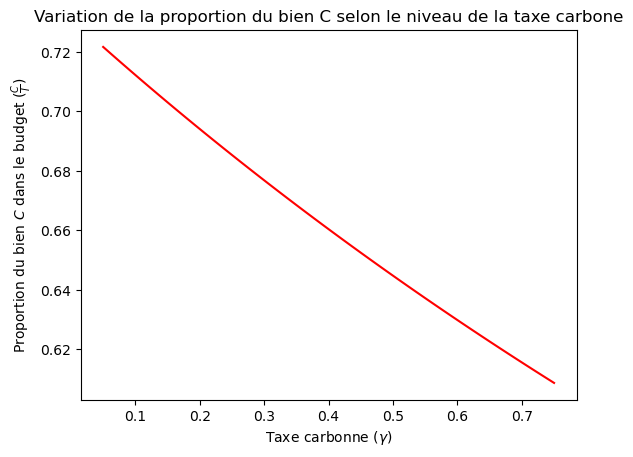

In [70]:
X = np.linspace(0.05, 0.75)
y = [Share(I, PN, PC * (1+gamma), alpha, p) for gamma in X]

plt.plot(X, y, 'r-')
plt.title('Variation de la proportion du bien C selon le niveau de la taxe carbone')
plt.xlabel(r'Taxe carbonne ($\gamma$)')
plt.ylabel(r'Proportion du bien $C$ dans le budget ($\frac{C}{I}$)')
plt.show()

Ceci est cohérent avec le fait que la fonction d'utilité est de type "Cobb-Douglas", en effet cela veux dire que son élasticité prix est de 1. C'est pourquoi la relation entre la taxe carbone et la proportion du bien C dans le budget est linéaire.

# Question 4